size my data:(22,437)


/scratch/paop01a4/.conda/envs/notebook/lib/python3.7/site-packages/sklearn/cluster/_agglomerative.py:281: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  X, connectivity, affinity="euclidean"


3
ward labels:((9614,))
[0 0 0 ... 1 1 1]


/scratch/paop01a4/.conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


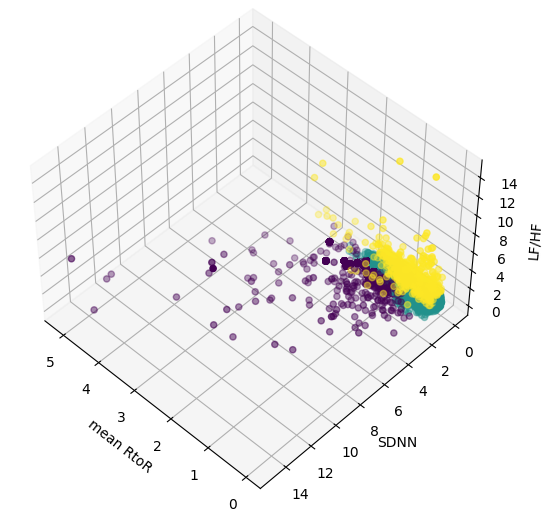

finishied!


In [1]:
#### Agglomorative Clustering - WARD ####
from numpy import genfromtxt
import numpy as np
import decimal as dcm
from sklearn import cluster
#from sklearn import preprocessing
import math
import pickle
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph

# read normalized data
my_data = genfromtxt('./ECGdata/total_user_whitenedmeanPerM_10scut10smv.csv', delimiter=',')
my_data_2 = genfromtxt('./ECGdata/total_user_whitenedSDNNPerM_10scut10smv.csv', delimiter=',')
my_data_3 = genfromtxt('./ECGdata/total_user_whitenedratioLFHF_10scut10smv.csv', delimiter=',')
# make data (userid, time(minute), mean, sdnn, ratioLFHF)
#print ('my data: {0}'.format(my_data[0,:]))
#print ('my data: {0}'.format(my_data_2[0,:]))
#print ('my data: {0}'.format(my_data_3[0,:]))
print ('size my data:({0},{1})'.format(my_data.shape[0],my_data.shape[1]))
row_c = my_data.shape[0]
col_c = my_data.shape[1]

n = 3
size_X = (row_c) * (col_c)
X = [[ 0 for k in range(n)] for j in range(size_X)] 
for i in range(0,row_c):
    for j in range(0, col_c):
        n_comp = i*col_c+j
        X[n_comp][0] = my_data[i,j]
        X[n_comp][1] = my_data_2[i,j]
        X[n_comp][2] = my_data_3[i,j]


n_clusters = 3
n_neighbors = 10
# connectivity matrix for structured Ward
connectivity = kneighbors_graph(
        X, n_neighbors, include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)
    
ward = cluster.AgglomerativeClustering(
        n_clusters, linkage='ward',
        connectivity=connectivity)

ward.fit(X[:][:])

if hasattr(ward, 'labels_'):
    y_pred = ward.labels_.astype(np.int)
else:
    y_pred = ward.predict(X)

print('{0}'.format(n_clusters))
print('ward labels:({0})\n{1}'.format(y_pred.shape, y_pred))
filex = open("labels.txt","a+")
#filex.write('{0}'.format(y_pred))
for i in range(y_pred.shape[0]):
     filex.write('{0},'.format(y_pred[i]))
filex.close()
#Draw Picture for the clustered data Set

#estimators = {'k_means_ECG_3': kmeans}
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
#ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(111, projection='3d')

#n = 9198
xs = my_data
ys = my_data_2
zs = my_data_3

ax.set_xlabel('mean RtoR')
ax.set_ylabel('SDNN')
ax.set_zlabel('LF/HF')

color=["r", "g", "b", "m"]
ax.scatter(xs, ys, zs, c=y_pred, cmap='viridis')

#plt.colorbar()
plt.show()

#Get the user and time position per label
for i in range(y_pred.shape[0]):
      if(y_pred[i]==0):
         timeinfo = i%col_c
         c_minute = timeinfo*10 #10sec, for 2 minute it was c_minute=timeinfo*2
         userinfo = int(i/col_c)
         file0 = open("0cluster.txt","a+")
         file0.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file0.close()
      if(y_pred[i]==1):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file1 = open("1cluster.txt","a+")
         file1.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file1.close()
      if(y_pred[i]==2):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file2 = open("2cluster.txt","a+")
         file2.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file2.close()
      if(y_pred[i]==3):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file3 = open("3cluster.txt","a+")
         file3.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file3.close()
      if(y_pred[i]==4):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file4 = open("4cluster.txt","a+")
         file4.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file4.close()
      if(y_pred[i]==5):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file5 = open("5cluster.txt","a+")
         file5.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file5.close()
      if(y_pred[i]==6):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file6 = open("6cluster.txt","a+")
         file6.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file6.close()
      if(y_pred[i]==7):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file7 = open("7cluster.txt","a+")
         file7.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file7.close()
      if(y_pred[i]==8):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file8 = open("8cluster.txt","a+")
         file8.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file8.close()
      if(y_pred[i]==9):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file9 = open("9cluster.txt","a+")
         file9.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file9.close()
      if(y_pred[i]==10):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file10 = open("10cluster.txt","a+")
         file10.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file10.close()    
print('finishied!')

size my data:(22,437)
4
gmm labels:((9614,))
[2 2 2 ... 3 3 3]


/scratch/paop01a4/.conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:52: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


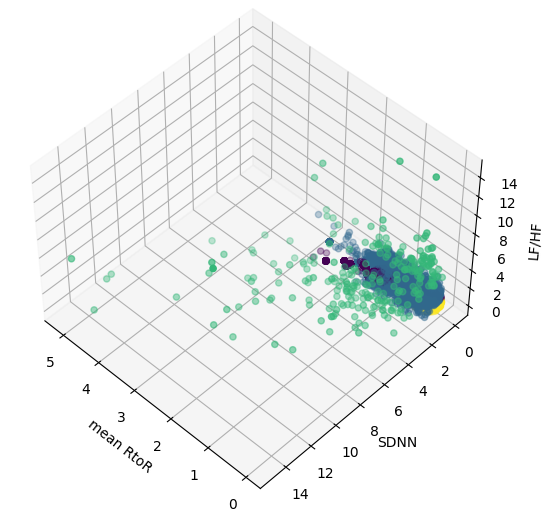

finishied!


In [2]:
#### gmm mixture ####
from numpy import genfromtxt
import numpy as np
import decimal as dcm
from sklearn import mixture
#from sklearn import preprocessing
import math
import pickle
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# read normalized data
my_data = genfromtxt('./ECGdata/total_user_whitenedmeanPerM_10scut10smv.csv', delimiter=',')
my_data_2 = genfromtxt('./ECGdata/total_user_whitenedSDNNPerM_10scut10smv.csv', delimiter=',')
my_data_3 = genfromtxt('./ECGdata/total_user_whitenedratioLFHF_10scut10smv.csv', delimiter=',')
print ('size my data:({0},{1})'.format(my_data.shape[0],my_data.shape[1]))
row_c = my_data.shape[0]
col_c = my_data.shape[1]

n = 3
size_X = (row_c) * (col_c)
X = [[ 0 for k in range(n)] for j in range(size_X)] 
for i in range(0,row_c):
    for j in range(0, col_c):
        n_comp = i*col_c+j
        X[n_comp][0] = my_data[i,j]
        X[n_comp][1] = my_data_2[i,j]
        X[n_comp][2] = my_data_3[i,j]


n_clusters = 4
gmm = mixture.GaussianMixture(n_clusters, covariance_type='full')

gmm.fit(X[:][:])
if hasattr(gmm, 'labels_'):
    y_pred = gmm.labels_.astype(np.int)
else:
    y_pred = gmm.predict(X)

print('{0}'.format(n_clusters))
print('gmm labels:({0})\n{1}'.format(y_pred.shape, y_pred))
filex = open("labels.txt","a+")
#filex.write('{0}'.format(y_pred))
for i in range(y_pred.shape[0]):
     filex.write('{0},'.format(y_pred[i]))
filex.close()

#Draw Picture for the clustered data Set

#estimators = {'k_means_ECG_3': kmeans}
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
#ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(111, projection='3d')

#n = 9198
xs = my_data
ys = my_data_2
zs = my_data_3

ax.set_xlabel('mean RtoR')
ax.set_ylabel('SDNN')
ax.set_zlabel('LF/HF')

color=["r", "g", "b", "m"]
ax.scatter(xs, ys, zs, c=y_pred, cmap='viridis')

#plt.colorbar()
plt.show()

#Get the user and time position per label
for i in range(y_pred.shape[0]):
      if(y_pred[i]==0):
         timeinfo = i%col_c
         c_minute = timeinfo*10 #10sec, for 2 minute it was c_minute=timeinfo*2
         userinfo = int(i/col_c)
         file0 = open("0cluster.txt","a+")
         file0.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file0.close()
      if(y_pred[i]==1):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file1 = open("1cluster.txt","a+")
         file1.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file1.close()
      if(y_pred[i]==2):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file2 = open("2cluster.txt","a+")
         file2.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file2.close()
      if(y_pred[i]==3):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file3 = open("3cluster.txt","a+")
         file3.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file3.close()
      if(y_pred[i]==4):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file4 = open("4cluster.txt","a+")
         file4.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file4.close()
      if(y_pred[i]==5):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file5 = open("5cluster.txt","a+")
         file5.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file5.close()
      if(y_pred[i]==6):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file6 = open("6cluster.txt","a+")
         file6.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file6.close()
      if(y_pred[i]==7):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file7 = open("7cluster.txt","a+")
         file7.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file7.close()
      if(y_pred[i]==8):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file8 = open("8cluster.txt","a+")
         file8.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file8.close()
      if(y_pred[i]==9):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file9 = open("9cluster.txt","a+")
         file9.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file9.close()
      if(y_pred[i]==10):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file10 = open("10cluster.txt","a+")
         file10.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file10.close()    
print('finishied!')    